In [22]:
%cd /Users/namir_oues/Documents/PhD/MDSubSampler
# import required packages
import mdss.protein_data as prot
import mdss.geometrical_property as gp
import mdss.sampler as s
import mdss.dissimilarity as d
import mdss.utilities as u
import mdss.pca_property as pca
import tempfile
import os
from IPython.display import Image, display

/Users/namir_oues/Documents/PhD/MDSubSampler


In [23]:
# set paths and all required arguments¶
trajectory_file = "data/input.xtc" 
topology_file = "data/input.gro" 
atom_selection = "name CA"
size = 10
dissimilarity_measure = d.Bhattacharyya

# set a temporary directory to save all output files
temp_dir = tempfile.mkdtemp()

In [24]:
# create a protein data object
p_data = prot.ProteinData(trajectory_file,topology_file,config_parameters=None)

In [25]:
# create a protein property object
p_property = pca.TrjPCAProj(p_data, atom_selection)
print(p_property)

In [26]:
# calculate reference property for full trajectory
property_vector = p_property.calculate_property()

In [27]:
# create uniform sampler object 
sampler_weighted = s.WeightedSampler(
            protein_property=p_property,
            protein_data=p_data,
            output_folder=temp_dir,
            file_prefix='subsampling',
            weights_vector=None,
            seed_number=1999,
            dissimilarity_measure=dissimilarity_measure,
        )

Weights not provided. They will be estimated from discretized property vector.


In [28]:
# generate sampled property for specific sample size
sampled_property = sampler_weighted.sample(round(int(size) * p_data.n_frames / 100))

In [34]:

sampled_property.calculate_property()

In [29]:
# generate trajectory and save output files in temporary directory
u.write_output_files(
    output_folder=temp_dir,
    file_prefix='subsampling',
    p_prop=p_property,
    s_prop=sampled_property,
    p_data=p_data,
    p=size,
    machine_learning=None,
)

In [30]:
# generate plot for and save files in temporary directory
u.plot_property(output_folder=temp_dir,
            file_prefix='subsampling',
            p_prop=p_property,
            s_prop=sampled_property,
            p=size,)

<Figure size 640x480 with 0 Axes>

In [31]:
# check the output files generated in the temporary directory 
print(os.listdir(temp_dir))

['subsampling_10_TrjPCAProj_plot.png', 'subsampling_10_TrjPCAProj.npy', 'subsampling_10_TrjPCAProj.xtc', 'subsampling_10_TrjPCAProj.dat']


subsampling_10_TrjPCAProj_plot.png


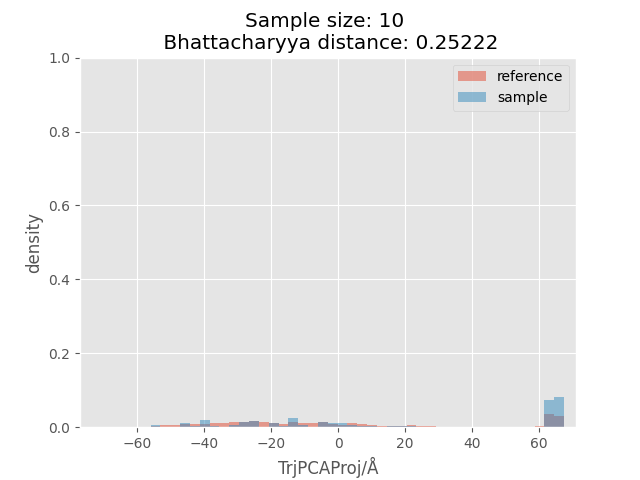

In [32]:
# display all distribution plots for all sample sizes 
for fname in (os.listdir(temp_dir)):
    fpath = os.path.join(temp_dir, fname)
    _, ext = os.path.splitext(fname)
    if ext == '.png':
        print(fname)
        display(Image(filename=fpath))

In [33]:
# display tables with calculated property for all different sample sizes
for fname in os.listdir(temp_dir):
    fpath = os.path.join(temp_dir, fname)
    _, ext = os.path.splitext(fname)
    if ext == '.dat':
            with open(fpath, 'r') as file:
                contents = file.read()
                print(fname)
                print('-----------------------')
                print(contents)  
                print('-----------------------')

subsampling_10_TrjPCAProj.dat
-----------------------
194 1.3628494344843136
230 -4.039310259513026
801 63.99376003875156
963 66.11901497792084
828 65.78231471026984
984 65.17729532006767
267 -14.485733378058022
906 65.32214831179407
925 64.3296685327168
842 64.80672653138868
65 -38.47573738475308
563 -39.99795948356143
827 63.99388450122105
235 -24.3173009443593
411 -28.12521177369027
868 63.97486673981093
523 -28.33890195559276
738 -14.284147268140435
941 63.309666399862245
939 62.040312433485404
102 -4.244010137112279
752 -0.5060507930906393
90 16.69557930084167
805 64.34064610370164
395 -45.873395009065355
753 -17.648653597042333
438 -39.24952149296544
927 65.84916812988217
257 21.02074410865119
72 4.882996006546046
894 62.12817311638481
674 -14.318170352387655
871 62.56007133946704
194 1.3628494344843136
874 65.42626739178925
526 -38.772014196483816
738 -14.284147268140435
993 62.809950095574905
941 63.309666399862245
228 -36.15672323222355
639 -41.145391806259305
389 -38.36425474